<a href="https://colab.research.google.com/github/jessica-guan/Python-DataSci-ML/blob/main/Copy_of_TRAIN_YLC_Week_8_Homework_Notebook_%5BSTUDENT%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework 8: Supervised Learning Review**
---

### **Description**

In this week's homework, we will review everything we have seen so far this year. This is your chance to clarify any points of confusion and ultimately ensure your comfort with the fundamentals of supervised machine learning from exploratory data analysis to evaluating linear regression models.

<br>

### **Structure**

**Part 1**: [Exploratory Data Analysis](#p1)
>
> **Part 1.1**: [Exploring and Cleaning Data](#p1.1)
>
> **Part 1.2**: [Visualizing Data](#p1.2)
>
**Part 2**: [Modeling `LV ActivePower (kW)`](#p2)
>
> **Part 2.1**: [Using the Data as Is](#p2.1)
>
> **Part 2.2**: [Attempting to Improve the Model](#p2.2)
>

<br>

### **Learning Objectives**

By the end of this homework, you will:
* Understand how to perform exploratory data analysis before applying ML.
* Understand how to implement and evaluate Linear Regression models in sklearn.

<br>

### **Resources**
* [EDA with pandas Cheat Sheet](https://docs.google.com/document/d/1xnKJsii1AsRH2t22XtrAh7FzSFGqAR0hAmW4oLYM4MI/edit?usp=drive_link)

* [Data Visualization with matplotlib](https://docs.google.com/document/d/1_3hzeIBPvcT6VC-eK-DDGVsKUvdVSvylNepoSLn2-T4/edit?usp=drive_link)

* [Linear Regression with sklearn Updated](https://docs.google.com/document/d/1DPUqouqGKeAYBfNBoHNsKRoQGXfD7mjUAvjjK0VsLbc/edit?usp=drive_link)


<br>

**Run the code below before continuing.**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.linear_model import LinearRegression

<a name="p1"></a>

---
## **Part 1: Exploratory Data Analysis**
---


**Run the code cell below to create the DataFrame.**

In [ ]:
power_df = pd.read_csv('https://raw.githubusercontent.com/the-codingschool/TRAIN-datasets/main/wind%20generator%20power/power%20-%20T1.csv.csv')

<a name="p1.1"></a>

---
### **Part 1.1: Exploratoring and Cleaning Data**
---

#### **Problem #1.1.1**

Using `.head()`, determine how many variables are included in this dataset.

In [ ]:
power_df.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 0:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 0:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 0:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 0:30,419.645904,5.659674,516.127569,271.258087
4,01 01 2018 0:40,380.650696,5.577941,491.702972,265.674286


#### **Problem #1.1.2**

Determine if there are any null values in this dataset and, if so, drop the rows they are in.

In [ ]:
print(power_df.isnull().sum())
power_df.dropna(inplace=True)

Date/Time                        0
LV ActivePower (kW)              1
Wind Speed (m/s)                 0
Theoretical_Power_Curve (KWh)    1
Wind Direction (°)               1
dtype: int64


#### **Problem #1.1.3**

Determine if there are any duplicate values in this dataset and, if so, drop the rows they are in.

In [ ]:
print(power_df.duplicated().sum())
power_df.drop_duplicates(inplace=True)

3


#### **Problem #1.1.4**

It is not possible in this case for the power generated to be negative. Check if there are any entries where `LV ActivePower (kW)` is negative and, if so, drop the rows they are in.

In [ ]:
negative_power_rows = power_df[power_df['LV ActivePower (kW)'] < 0]
power_df = power_df[power_df['LV ActivePower (kW)'] >= 0]

#### **Problem #1.1.5**

After potentially dropping rows above, determine how many data points remain in the dataset.

In [ ]:
power_df.shape[0]

50473

#### **Problem #1.1.6**

Using pandas methods, determine the following statistics about this dataset:
* Average of each variable.
* Minimum of each variable.
* Maximum of each variable.
* Standard Deviation of each variable.

In [ ]:
power_df.describe()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
count,50473.000000,50473.000000,50473.000000,50473.000000
mean,1309.161489,7.563317,1493.846082,123.648102
std,1312.463427,4.226509,1367.885865,93.446383
min,0.000000,0.000000,0.000000,0.000000
25%,52.740540,4.210382,163.084179,49.304878
50%,828.006714,7.111886,1067.161300,73.660377
75%,2484.364014,10.303410,2966.774233,201.684006
max,3618.732910,25.206011,3600.000000,359.997589


#### **Problem #1.1.7**

To finish our initial data exploration, let's look at the `Date/Time` variable. Specifically,

1. Look at the first 10 rows of this variable and determine the relationship between this variable and `power_df.index`.
1. Determine how many data points fit into one day.
1. Determine how many days are contained in this dataset.

##### **1. Look at the first 10 rows of this variable and determine the relationship between this variable and `power_df.index`.**

In [ ]:
first_10_date_time = power_df['Date/Time'].iloc[:10]
index_relationship = power_df.index[:10]

print(first_10_date_time)
print(index_relationship)

0    01 01 2018 0:00
1    01 01 2018 0:10
2    01 01 2018 0:20
3    01 01 2018 0:30
4    01 01 2018 0:40
5    01 01 2018 0:50
6    01 01 2018 1:00
7    01 01 2018 1:10
8    01 01 2018 1:20
9    01 01 2018 1:30
Name: Date/Time, dtype: object
Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64')


##### **2. Determine how many data points fit into one day.**

Specifically, find the value for `day_len` such that the code below prints out up to `02 01 2018 0:00` at the end.

In [ ]:
time_diff = (power_df['Date/Time'].iloc[-1] - power_df['Date/Time'].iloc[0]) / (len(power_df) - 1)
day_len = pd.Timedelta(days=1) / time_diff

##### **3. Determine how many days are contained in this dataset.**


**Hint**: Use the variable you created above, `day_len`. Be careful about how you approach this though! If you dropped any null values, there may be missing times.

In [ ]:
print(len(power_df) / day_len)

365.0002871502973


<a name="p1.2"></a>

---
### **Part 1.2: Visualizing Data**
---

Make sure you include proper labels and consider adjusting the figure size, color, and other aspects of the visuals to make them as clear as possible.

#### **Problem #1.2.1**

Plot `LV ActivePower (kW)` over time, using `power_df.index` as the x axis representing time.

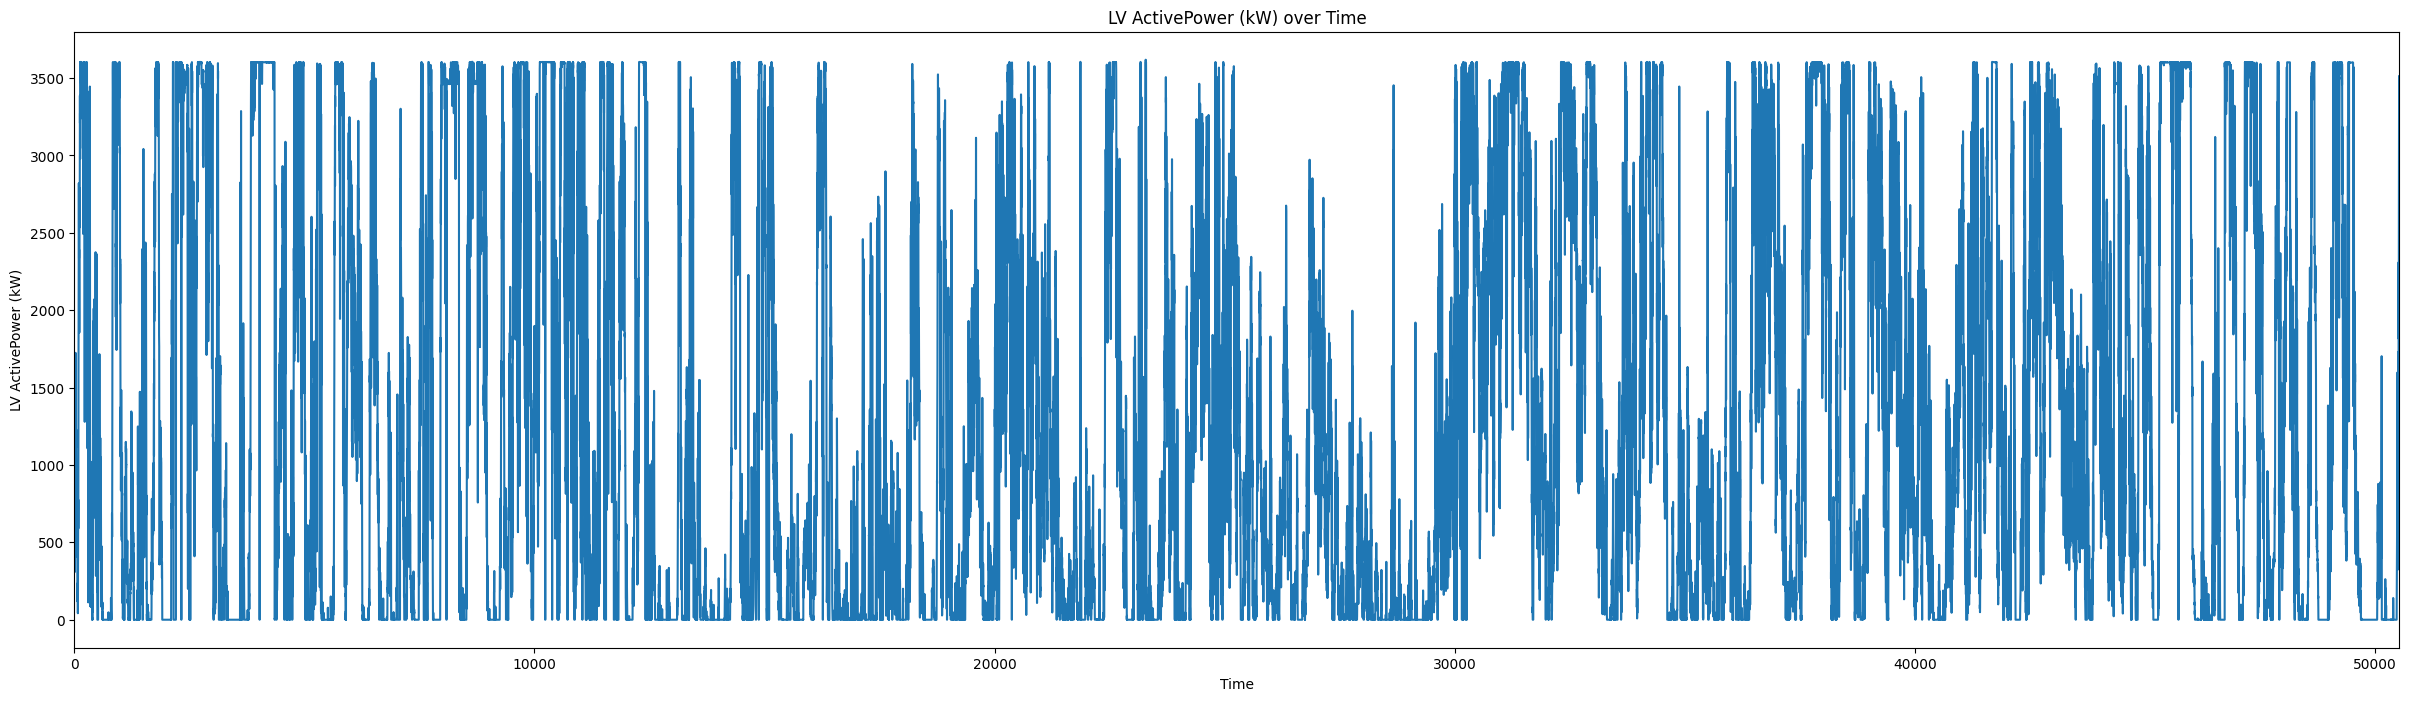

In [ ]:
start = power_df.index[0]  # Set the start index as the first index in the DataFrame
end = power_df.index[-1]  # Set the end index as the last index in the DataFrame

x = power_df.index  # Use power_df.index as the x-axis
y = power_df['LV ActivePower (kW)']  # 'LV ActivePower (kW)' as the y-axis

plt.figure(figsize=(30, 8))
plt.plot(x, y)  # Plot x and y
plt.xlabel('Time')
plt.ylabel('LV ActivePower (kW)')
plt.title('LV ActivePower (kW) over Time')

plt.xlim(start, end)  # Set the x-axis limits based on start and end indices

plt.show()

#### **Problem #1.2.2**

The plot above contains a *lot* of data and it can be hard to really see any patterns in it. In the space below, create the same plot, but only for the first day's worth of data. **NOTE**: Do not worry about missing/dropped rows, simply use a full 24 hours worth of data.

<br>

**Hint**: Use the `day_len` variable you created in the section above.

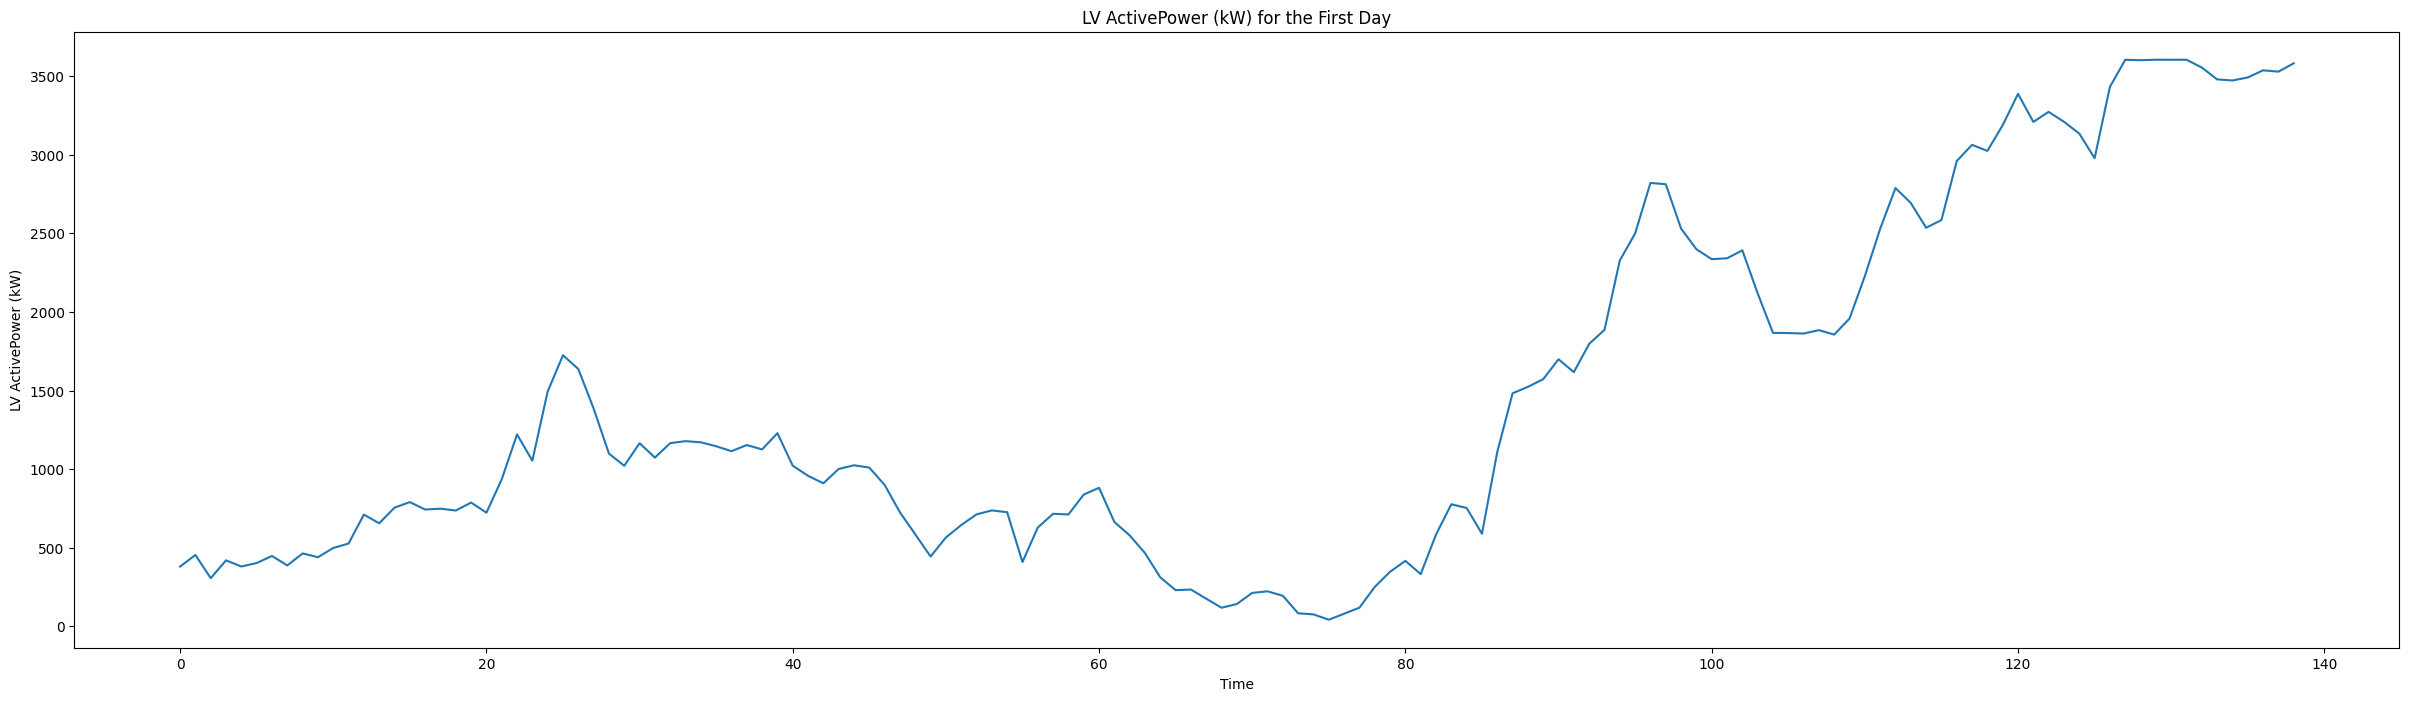

In [ ]:
# Calculate the average time difference between consecutive timestamps
time_diff = (power_df['Date/Time'].iloc[-1] - power_df['Date/Time'].iloc[0]) / (len(power_df) - 1)

# Calculate the number of data points fitting into one day
points_per_day = pd.Timedelta(days=1) / time_diff

# Set start and end indices for the first day's worth of data
start = 0  # Start index
end = int(points_per_day)  # End index for the first day's data

x = power_df.index  # Use power_df.index as the x-axis
y = power_df['LV ActivePower (kW)']  # 'LV ActivePower (kW)' as the y-axis

plt.figure(figsize=(30, 8))
plt.plot(x[start:end], y[start:end])

plt.xlabel('Time')
plt.ylabel('LV ActivePower (kW)')
plt.title('LV ActivePower (kW) for the First Day')

plt.show()

#### **Problem #1.2.3**

Create a similar plot, but for the first *week's* worth of data. **NOTE**: Do not worry about missing/dropped rows, simply use a full 7 days worth of data.

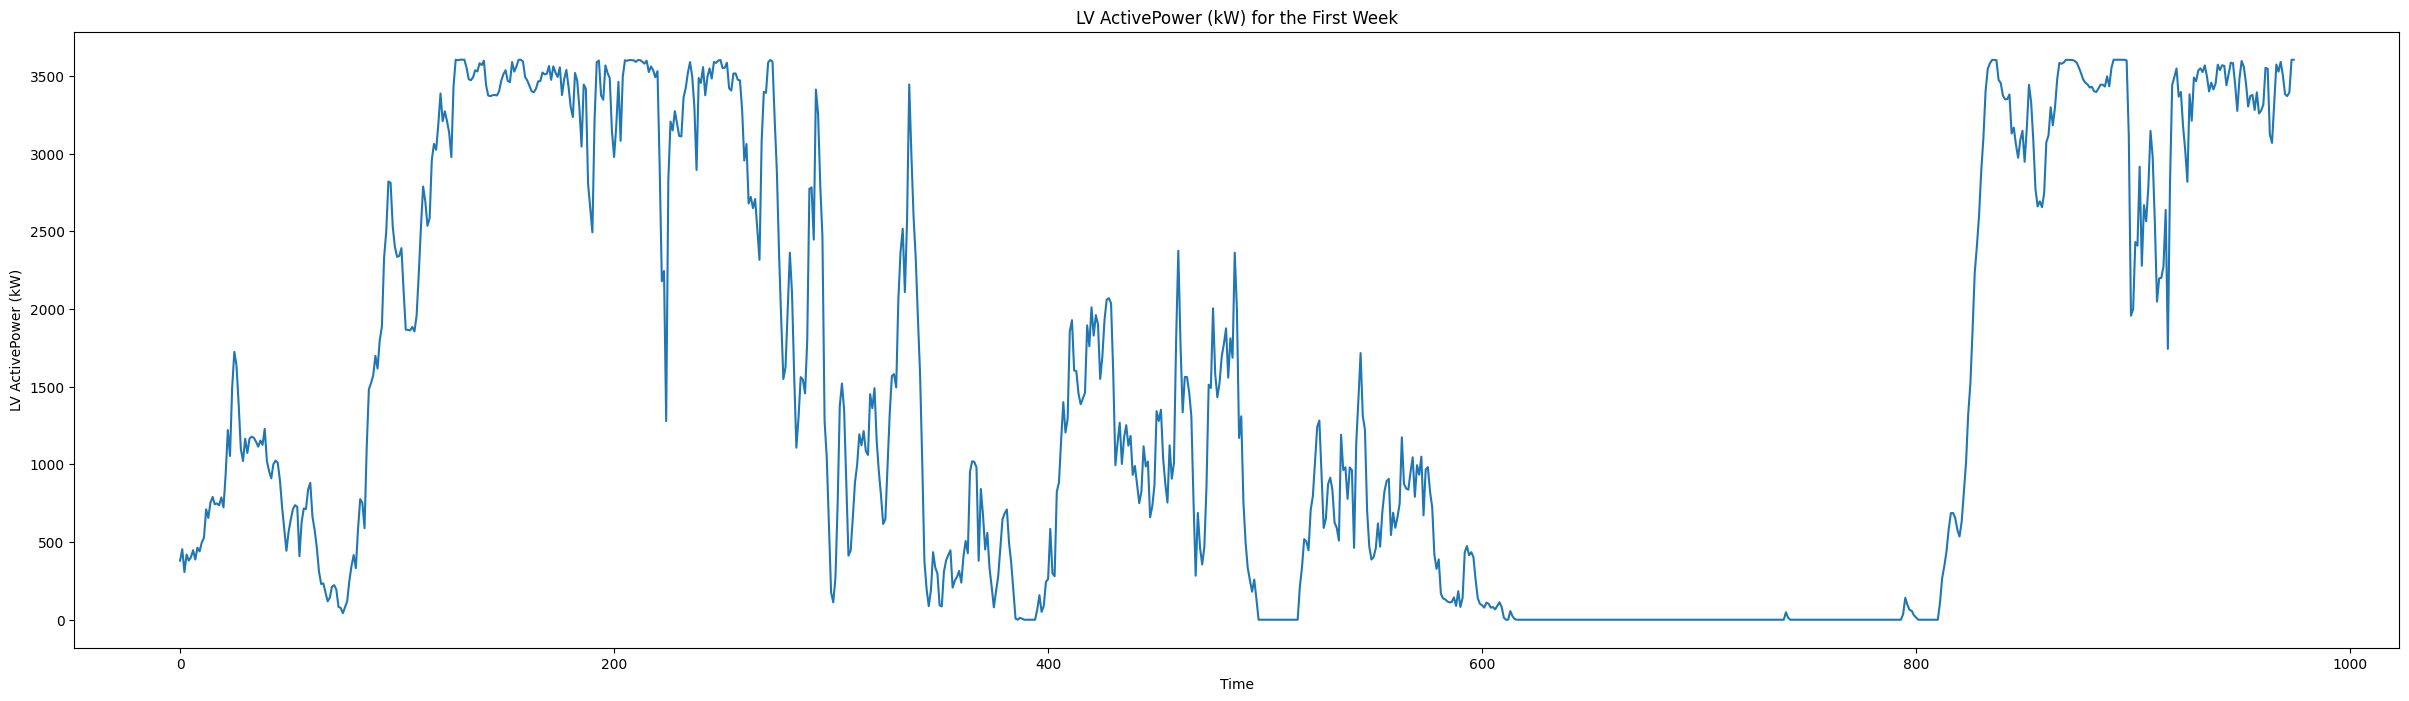

In [ ]:
# Calculate the average time difference between consecutive timestamps
time_diff = (power_df['Date/Time'].iloc[-1] - power_df['Date/Time'].iloc[0]) / (len(power_df) - 1)

# Calculate the number of data points fitting into one day
points_per_day = pd.Timedelta(days=1) / time_diff

# Calculate the number of data points fitting into one week (seven days)
points_per_week = points_per_day * 7

# Set start and end indices for the first week's worth of data
start = 0  # Start index
end = int(points_per_week)  # End index for the first week's data

x = power_df.index  # Use power_df.index as the x-axis
y = power_df['LV ActivePower (kW)']  # 'LV ActivePower (kW)' as the y-axis

plt.figure(figsize=(30, 8))
plt.plot(x[start:end], y[start:end])

plt.xlabel('Time')
plt.ylabel('LV ActivePower (kW)')
plt.title('LV ActivePower (kW) for the First Week')

plt.show()

#### **[OPTIONAL] Problem #1.2.4**

Read about the [matplotlib.pyplot.axvline(...) method](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axvline.html) and use it to create a vertical line on this plot at the beginning of each day.

<br>

**NOTE**: We recommend that you skip this problem for now and come back later if you're curious.

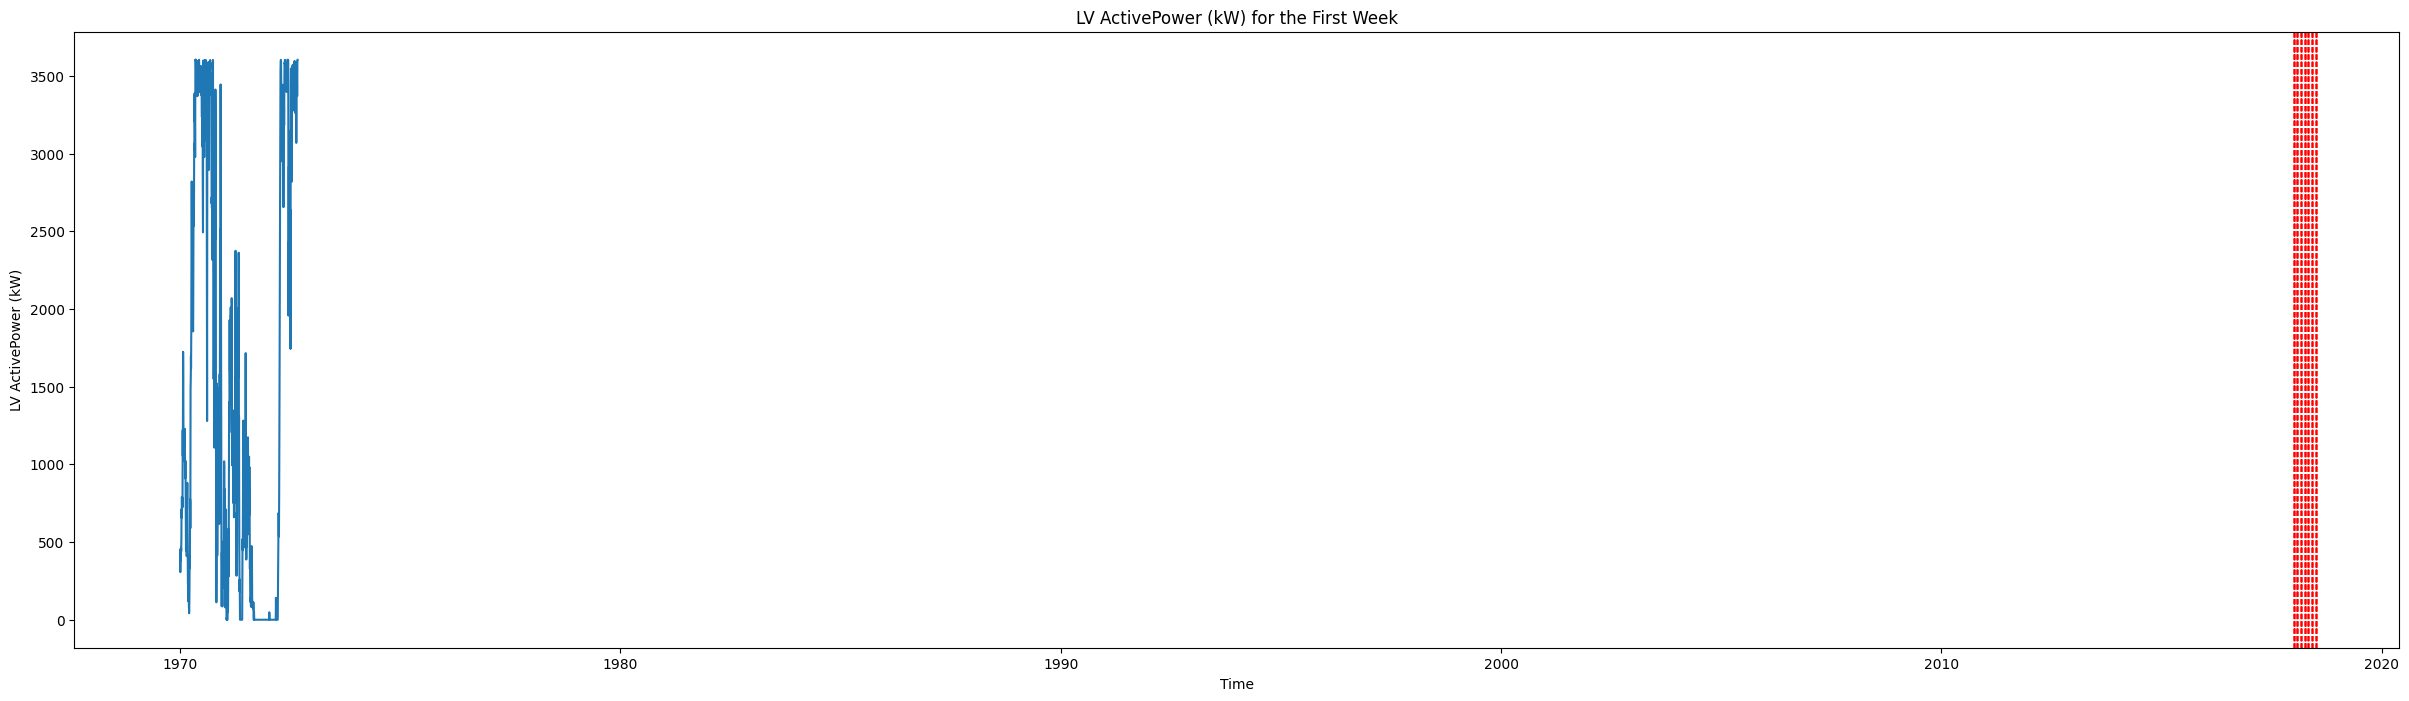

In [ ]:
import matplotlib.pyplot as plt

# Your previous code to define start and end indices for the first week's data
# ...

# Plotting the data for the first week
plt.figure(figsize=(30, 8))
plt.plot(x[start:end], y[start:end])

plt.xlabel('Time')
plt.ylabel('LV ActivePower (kW)')
plt.title('LV ActivePower (kW) for the First Week')

# Getting the timestamps for the start of each day within the plotted data
start_of_days = power_df['Date/Time'].iloc[start:end][power_df['Date/Time'].iloc[start:end].dt.hour == 0]

# Adding vertical lines for the start of each day
for timestamp in start_of_days:
    plt.axvline(x=timestamp, color='r', linestyle='--', linewidth=1)

plt.show()

#### **Problem #1.2.5**

Create a similar plot, but for the first week's worth of `Wind Speed (m/s)` data on the y axis.

<br>

**NOTE**: You *do not* need to include vertical lines.

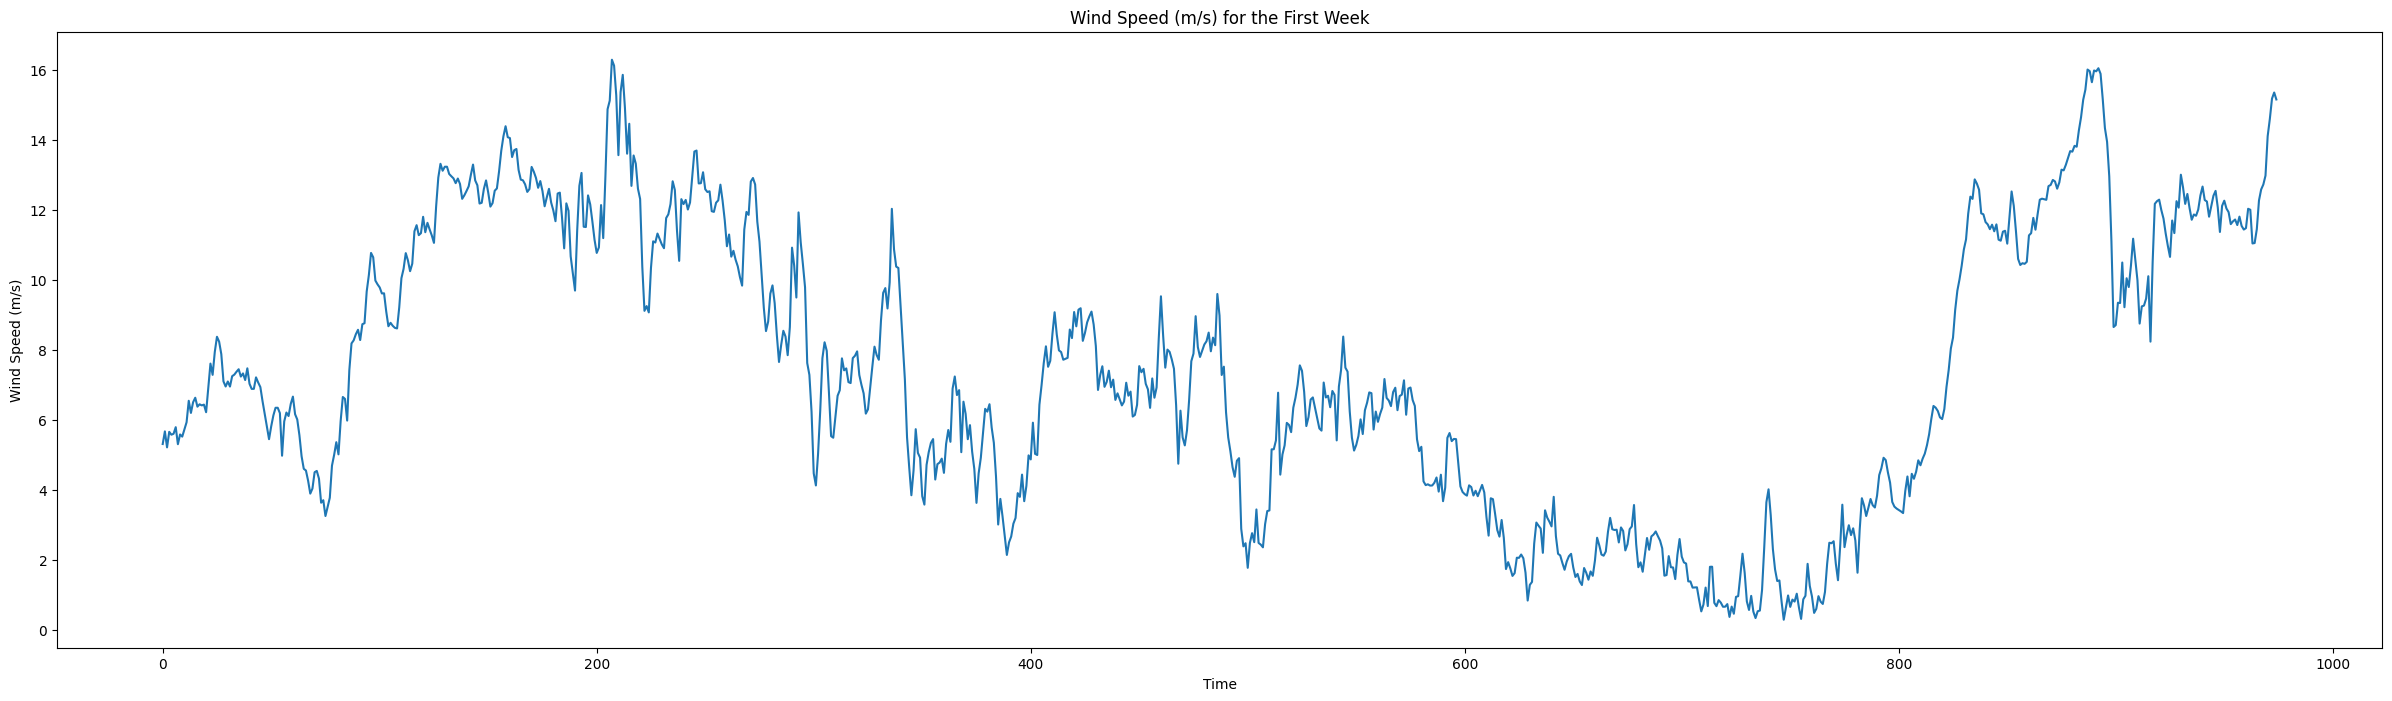

In [ ]:
# Calculate the average time difference between consecutive timestamps
time_diff = (power_df['Date/Time'].iloc[-1] - power_df['Date/Time'].iloc[0]) / (len(power_df) - 1)

# Calculate the number of data points fitting into one day
points_per_day = pd.Timedelta(days=1) / time_diff

# Calculate the number of data points fitting into one week (seven days)
points_per_week = points_per_day * 7

# Set start and end indices for the first week's worth of data
start = 0  # Start index
end = int(points_per_week)  # End index for the first week's data

x = power_df.index  # Use power_df.index as the x-axis
y = power_df['Wind Speed (m/s)']  # 'Wind Speed (m/s)' as the y-axis

plt.figure(figsize=(30, 8))
plt.plot(x[start:end], y[start:end])

plt.xlabel('Time')
plt.ylabel('Wind Speed (m/s)')
plt.title('Wind Speed (m/s) for the First Week')

plt.show()

#### **Problem #1.2.6**

Create a similar plot, but for the first week's worth of `Wind Direction (°)` data on the y axis.

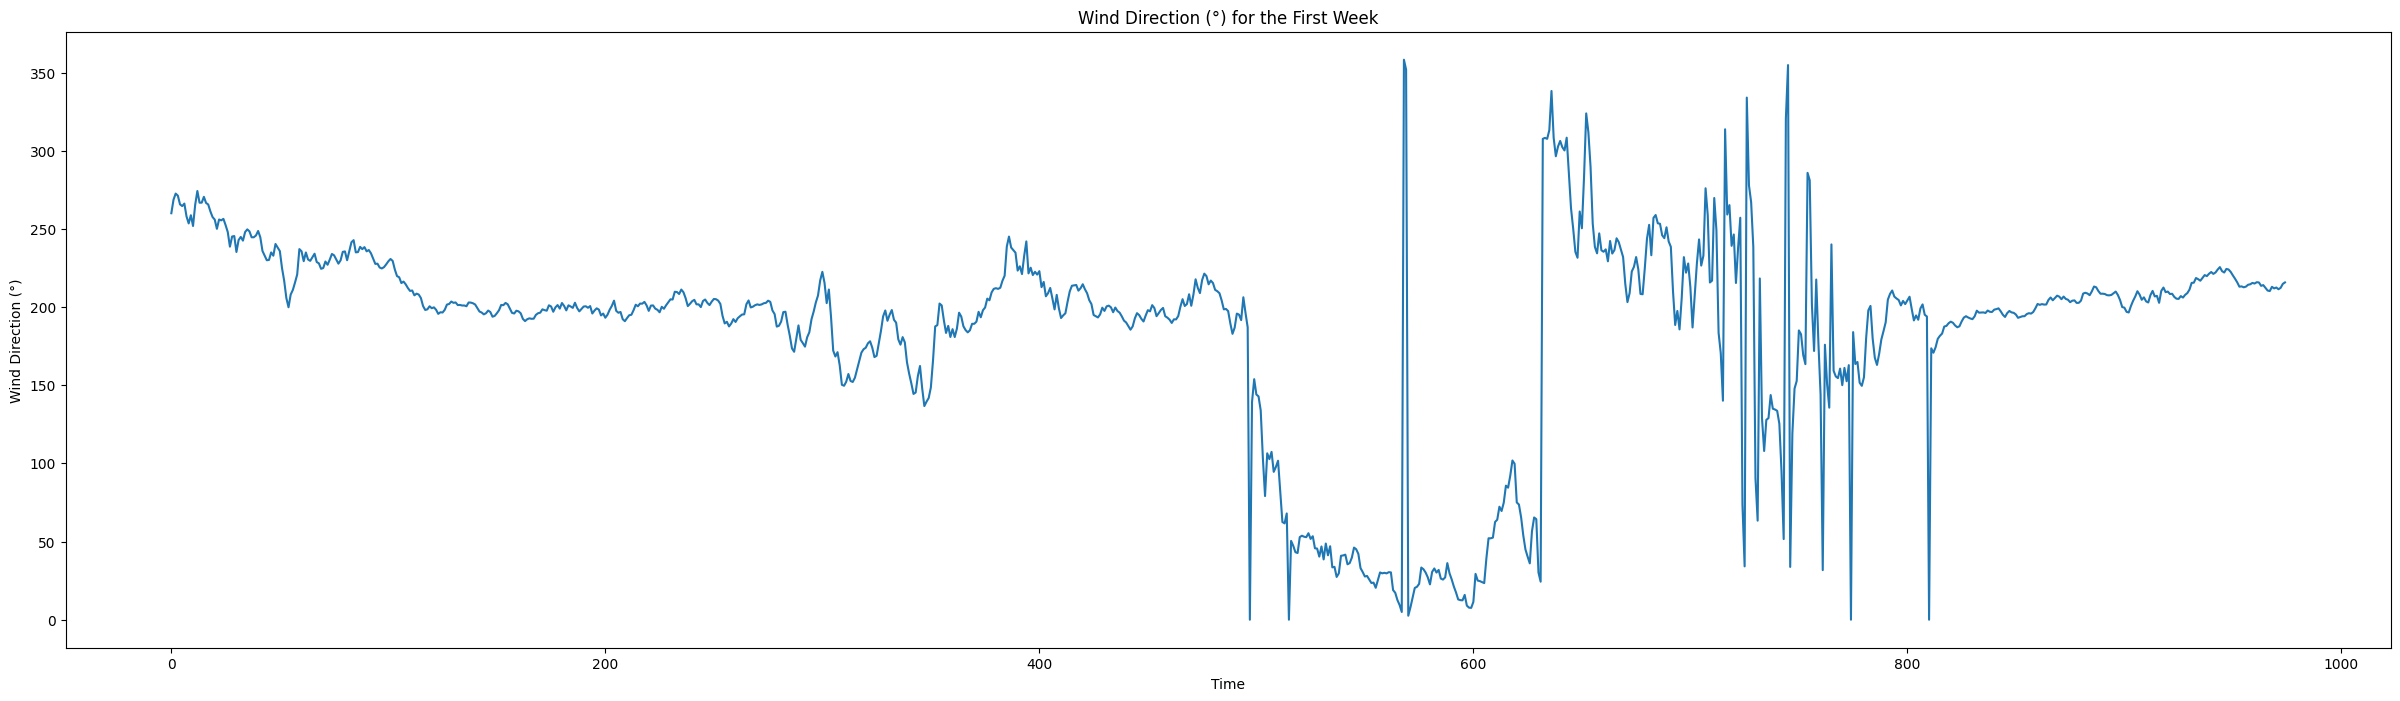

In [ ]:
# Calculate the average time difference between consecutive timestamps
time_diff = (power_df['Date/Time'].iloc[-1] - power_df['Date/Time'].iloc[0]) / (len(power_df) - 1)

# Calculate the number of data points fitting into one day
points_per_day = pd.Timedelta(days=1) / time_diff

# Calculate the number of data points fitting into one week (seven days)
points_per_week = points_per_day * 7

# Set start and end indices for the first week's worth of data
start = 0  # Start index
end = int(points_per_week)  # End index for the first week's data

x = power_df.index  # Use power_df.index as the x-axis
y = power_df['Wind Direction (°)']  # 'Wind Direction (°)' as the y-axis

plt.figure(figsize=(30, 8))
plt.plot(x[start:end], y[start:end])

plt.xlabel('Time')
plt.ylabel('Wind Direction (°)')
plt.title('Wind Direction (°) for the First Week')

plt.show()

#### **Problem #1.2.7**

Now, create a plot to see the relationship between `LV ActivePower (kW)` and `Wind Speed (m/s)`.

<br>

**NOTE**: We will be using `LV ActivePower (kW)` as our label, so it is natural (but not strictly required) to use this as the y variable.

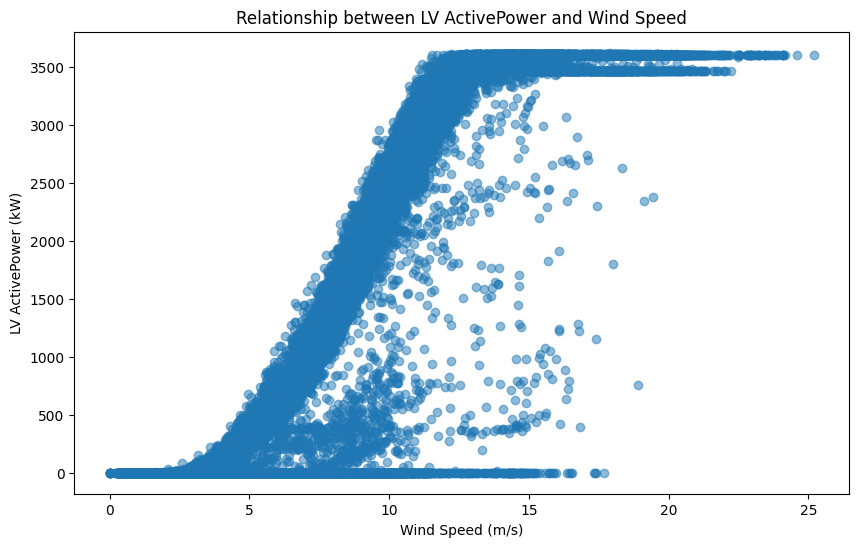

In [ ]:
x = power_df['Wind Speed (m/s)']  # 'Wind Speed (m/s)' as the x-axis
y = power_df['LV ActivePower (kW)']  # 'LV ActivePower (kW)' as the y-axis

plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5)  # Create a scatter plot

plt.xlabel('Wind Speed (m/s)')
plt.ylabel('LV ActivePower (kW)')
plt.title('Relationship between LV ActivePower and Wind Speed')

plt.show()

#### **Problem #1.2.8**

Create a plot to see the relationship between `LV ActivePower (kW)` and `Wind Direction (°)`.

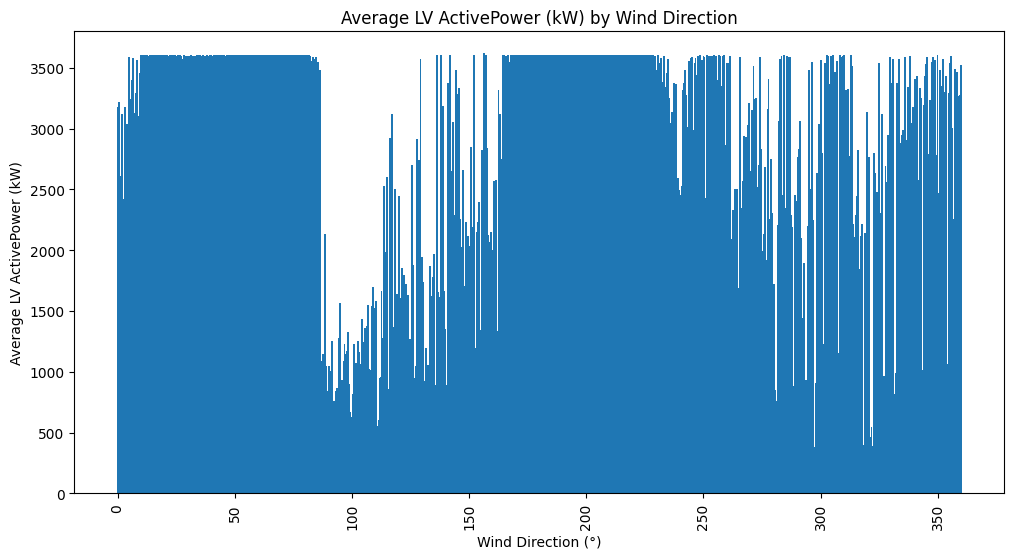

In [ ]:
import numpy as np

# Grouping by 'Wind Direction (°)' and calculating the average LV ActivePower (kW) for each direction
avg_power_by_direction = power_df.groupby('Wind Direction (°)').agg({'LV ActivePower (kW)': 'mean'})

# Extracting the wind directions and their corresponding average LV ActivePower (kW)
wind_directions = avg_power_by_direction.index
avg_power = avg_power_by_direction['LV ActivePower (kW)']

plt.figure(figsize=(12, 6))
plt.bar(wind_directions, avg_power)

plt.xlabel('Wind Direction (°)')
plt.ylabel('Average LV ActivePower (kW)')
plt.title('Average LV ActivePower (kW) by Wind Direction')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=90)

plt.show()

#### **Problem #1.2.9**

Create a plot to see the relationship between `LV ActivePower (kW)` and `Theoretical_Power_Curve (KWh)`.

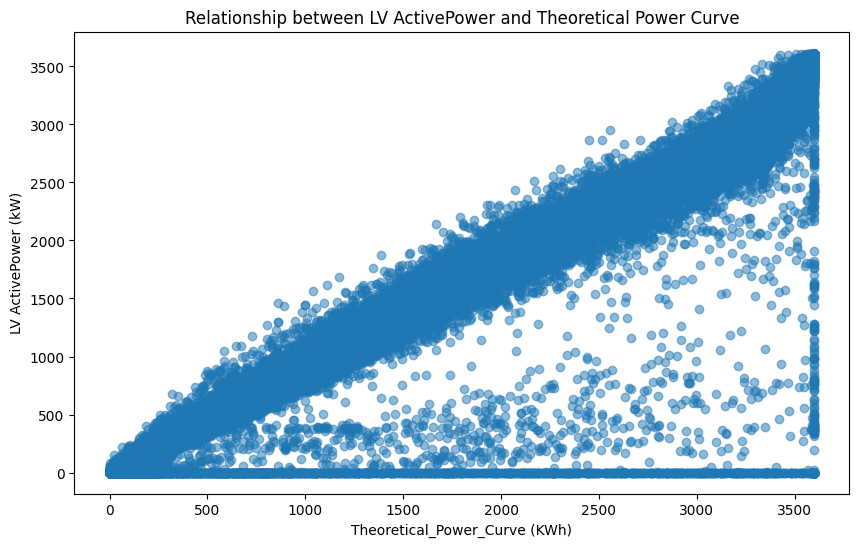

In [ ]:
x = power_df['Theoretical_Power_Curve (KWh)']  # 'Theoretical_Power_Curve (KWh)' as the x-axis
y = power_df['LV ActivePower (kW)']  # 'LV ActivePower (kW)' as the y-axis

plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5)  # Create a scatter plot

plt.xlabel('Theoretical_Power_Curve (KWh)')
plt.ylabel('LV ActivePower (kW)')
plt.title('Relationship between LV ActivePower and Theoretical Power Curve')

plt.show()

#### **Problem #1.2.10**

It's common that during data visualization, certain aspects of the data will become clear that warrant further modification of the data. In this particular case, these plots have highlighted several aspects of the data that we should consider in our modeling:

1. When `LV ActivePower (kW)` is 0, the other variables can take on a very wide range of values. This is *likely* a sign that we cannot trust the data when `LV ActivePower (kW)` is 0 since it seems to have very little relationship to the other variables, which is not particularly realistic. **NOTE**: This is can be seen by a straight horizontal line of data running along the bottom of the x axis.

2. Similarly, when `Theoretical_Power_Curve (KWh)` is at its maximum, the other variables can take on a wide range of values. **NOTE**: This can be seen by a straight vertical line of data running along the right side of the graph with `Theoretical_Power_Curve (KWh)`.


<br>

Complete the code below to verify the two patterns described above and that this *doesn't* occur for the other variables. **NOTE**: We have provided you the code for `LV ActivePower (kW)` to get you started.

##### **`LV ActivePower (kW)`**

In [ ]:
rows_to_examine = power_df['LV ActivePower (kW)'] == 0

power_df[rows_to_examine].describe()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
count,10781.0,10781.000000,10781.000000,10781.000000
mean,0.0,3.121525,257.199356,153.527840
std,0.0,2.472904,729.154681,111.094082
min,0.0,0.000000,0.000000,0.000000
25%,0.0,1.738193,0.000000,51.330460
50%,0.0,2.475772,0.000000,125.123703
75%,0.0,3.270413,30.503065,253.854904
max,0.0,17.669189,3600.000000,359.987396


In [ ]:
rows_to_examine = power_df['LV ActivePower (kW)'] == power_df['LV ActivePower (kW)'].max()

power_df[rows_to_examine].describe()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
count,1.00000,1.00000,1.0,1.000000
mean,3618.73291,17.91428,3600.0,156.281097
std,NaN,NaN,NaN,NaN
min,3618.73291,17.91428,3600.0,156.281097
25%,3618.73291,17.91428,3600.0,156.281097
50%,3618.73291,17.91428,3600.0,156.281097
75%,3618.73291,17.91428,3600.0,156.281097
max,3618.73291,17.91428,3600.0,156.281097


##### **`Theoretical_Power_Curve (KWh)`**

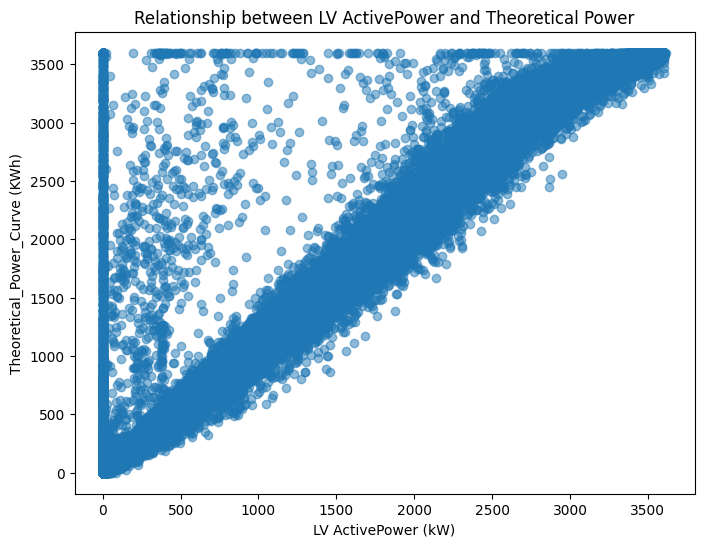

In [ ]:
plt.figure(figsize=(8, 6))

plt.scatter(power_df['LV ActivePower (kW)'], power_df['Theoretical_Power_Curve (KWh)'], alpha=0.5)
plt.xlabel('LV ActivePower (kW)')
plt.ylabel('Theoretical_Power_Curve (KWh)')
plt.title('Relationship between LV ActivePower and Theoretical Power')

plt.show()

##### **`Wind Speed (m/s)`**

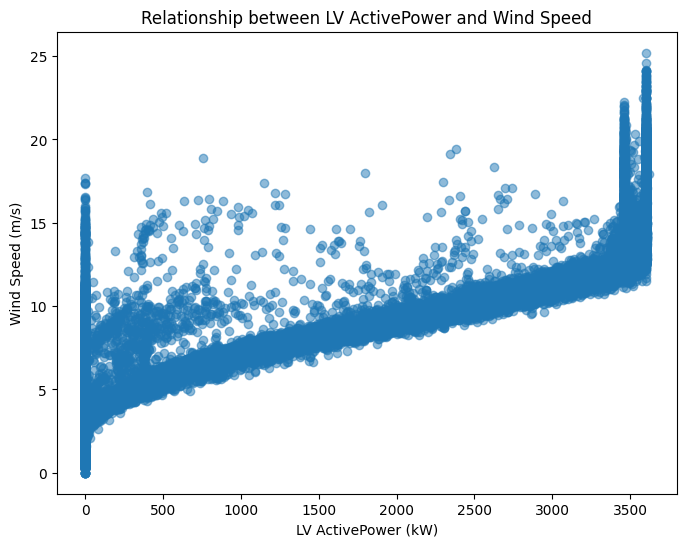

In [ ]:
plt.figure(figsize=(8, 6))

plt.scatter(power_df['LV ActivePower (kW)'], power_df['Wind Speed (m/s)'], alpha=0.5)
plt.xlabel('LV ActivePower (kW)')
plt.ylabel('Wind Speed (m/s)')
plt.title('Relationship between LV ActivePower and Wind Speed')

plt.show()

##### **`Wind Direction (°)`**

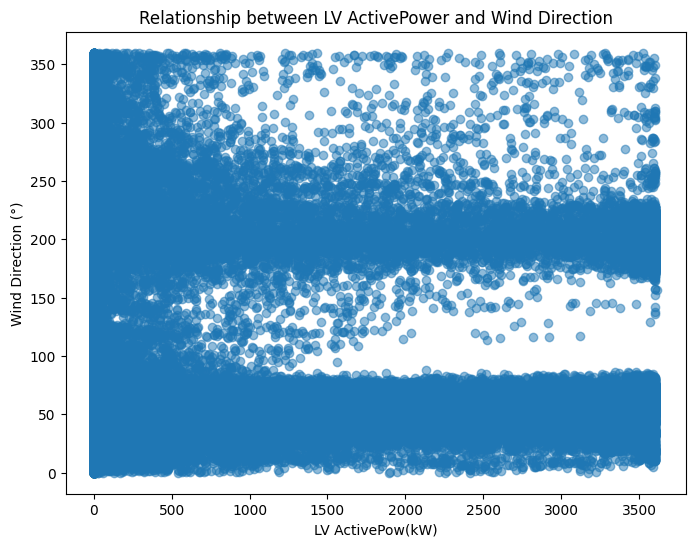

In [ ]:
plt.figure(figsize=(8, 6))

plt.scatter(power_df['LV ActivePower (kW)'], power_df['Wind Direction (°)'], alpha=0.5)
plt.xlabel('LV ActivePow(kW)')
plt.ylabel('Wind Direction (°)')
plt.title('Relationship between LV ActivePower and Wind Direction')

plt.show()

<a name="p2"></a>

---
## **Part 2: Modeling `LV ActivePower (kW)`**
---

In this part, you will use linear regression to model `LV ActivePower (kW)` following our 8 step model implementation process.

<a name="p2.1"></a>

---
### **Part 2.1: Using the Data as Is**
---

Let's start by working with the data as is, instead of considering any adjustments based on Problem #1.2.10 (which you can do in the optional section at the end).

#### **Step #1: Load in the data**

This step was completed above.

#### **Step #2: Decide independent and dependent variables**

`LV ActivePower (kW)` is our label (dependent variable) and every other variable other than `Date/Time` will make up our features.

In [ ]:
independent_variables = ['Theoretical_Power_Curve (KWh)', 'Wind Speed (m/s)', 'Wind Direction (°)']
dependent_variable = 'LV ActivePower (kW)'
X = power_df[independent_variables]
y = power_df[dependent_variable]

#### **Step #3: Split data into training and testing data**

Complete the code below to split the data, using 80% for training and 20% for testing.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### **Step #4: Import the algorithm**

In [ ]:
from sklearn.linear_model import LinearRegression

#### **Step #5: Initialize the model and set hyperparameters**

For linear regression, there are no hyperparameters to set.

In [ ]:
model = LinearRegression()

#### **Step #6: Fit your model and make a prediction.**

Create a visualization if applicable.

Specifically,

1. Fit the model to the training data and make predictions on the test data.
2. Visualize the results.

##### **1. Fit the model to the training data.**

In [ ]:
model.fit(X_train, y_train)
predictions = model.predict(X_test)

##### **2. Visualize the results.**

Compare the true test values versus the predicted values.

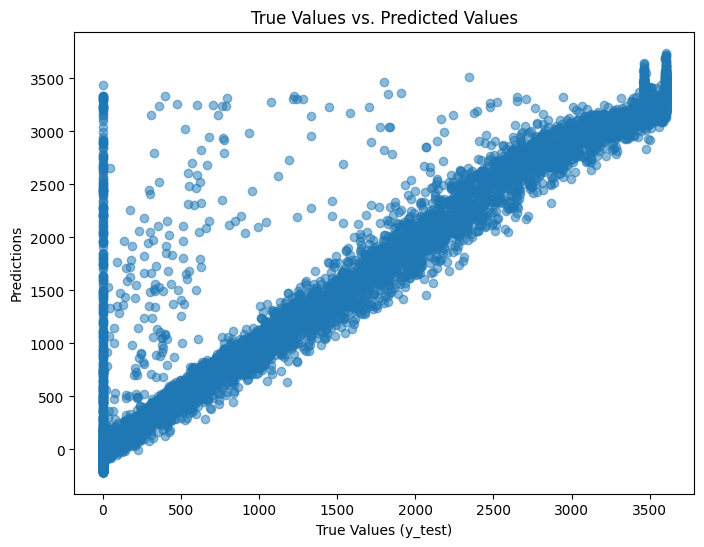

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.xlabel('True Values (y_test)')
plt.ylabel('Predictions')
plt.title('True Values vs. Predicted Values')

plt.show()

#### **Step #7: Evaluate the model's performance**

Specifically,

1. Use $\text{R}^2$, $\text{MSE}$, and $\text{MAE}$ to evaluate this model.

2. Visualize and interpret the residuals.

##### **1. Use $\text{R}^2$, $\text{MSE}$, and $\text{MAE}$ to evaluate this model.**

In [ ]:
print(r2_score(y_test, predictions))
print(mean_squared_error(y_test, predictions))
print(mean_absolute_error(y_test, predictions))

0.9079073265390113
158857.7754279008
185.8866099191219


##### **2. Visualize and interpret the residuals.**

Plot the residuals for each test point and confirm that they are randomly distributed around 0.

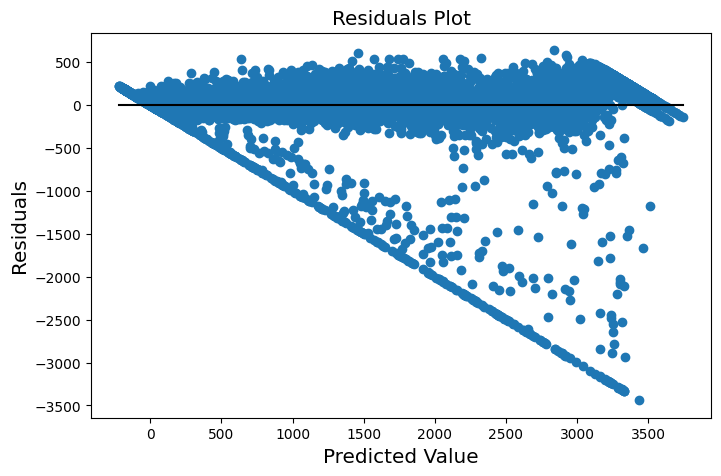

In [ ]:
residuals = y_test - predictions

plt.figure(figsize = (8, 5))
plt.scatter(predictions, residuals)

plt.plot([predictions.min(), predictions.max()], [0, 0], color = "black")


plt.title("Residuals Plot", fontsize = "x-large")
plt.xlabel("Predicted Value", fontsize = "x-large")
plt.ylabel("Residuals", fontsize = "x-large")

plt.show()

#### **Step #8: Use the model**

Specifically,

1. Predict the power output for the three three provided data points.

2. Compare these values to the minimum, average, and maximum outputs.

3. Visualize the modeled relationship between `LV ActivePower (kW)` and each of the three features used to see if a qualitative relationship can be inferred.

4. Look at the coefficients and intercept to determine the modeled relationships quantitatively.

##### **1. Predict the power output for the following data points:**

* **Data Point 1: The Minimum** - Each feature for this data point should be the minimum possible value found in the dataset.
* **Data Point 2: The Average** - Each feature for this data point should be the average value found in the dataset.
* **Data Point 3: The Maximum** - Each feature for this data point should be the maximum value found int he dataset.

<br>

**NOTE**: There are several ways to accomplish this, with the easiest relying on pandas methods.

In [ ]:
data_point_min = power_df[independent_variables].min()  # Minimum values
data_point_avg = power_df[independent_variables].mean()  # Average values
data_point_max = power_df[independent_variables].max()  # Maximum values

new_data = pd.DataFrame([data_point_min, data_point_avg, data_point_max], columns=X_test.columns)

predictions_new_data = model.predict(new_data)

##### **2. Compare these values to the minimum, average, and maximum outputs.**

Find the minimum, average, and maximum for `LV ActivePower (kW)` and compare to the predicted values above.

<br>

**NOTE**: These are not exactly the actual values we should expect for the data points above, but they are a good way to *loosely* check our model in this case.

In [ ]:
y.describe()

count    50473.000000
mean      1309.161489
std       1312.463427
min          0.000000
25%         52.740540
50%        828.006714
75%       2484.364014
max       3618.732910
Name: LV ActivePower (kW), dtype: float64

##### **3. Visualize the modeled relationship between `LV ActivePower (kW)` and each of the three features used to see if a qualitative relationship can be inferred.**

Specifically, plot the predicted and actual values in the test set against each feature.

<br>

**NOTE**: Make sure to include proper axis labels, a title, and a legend.

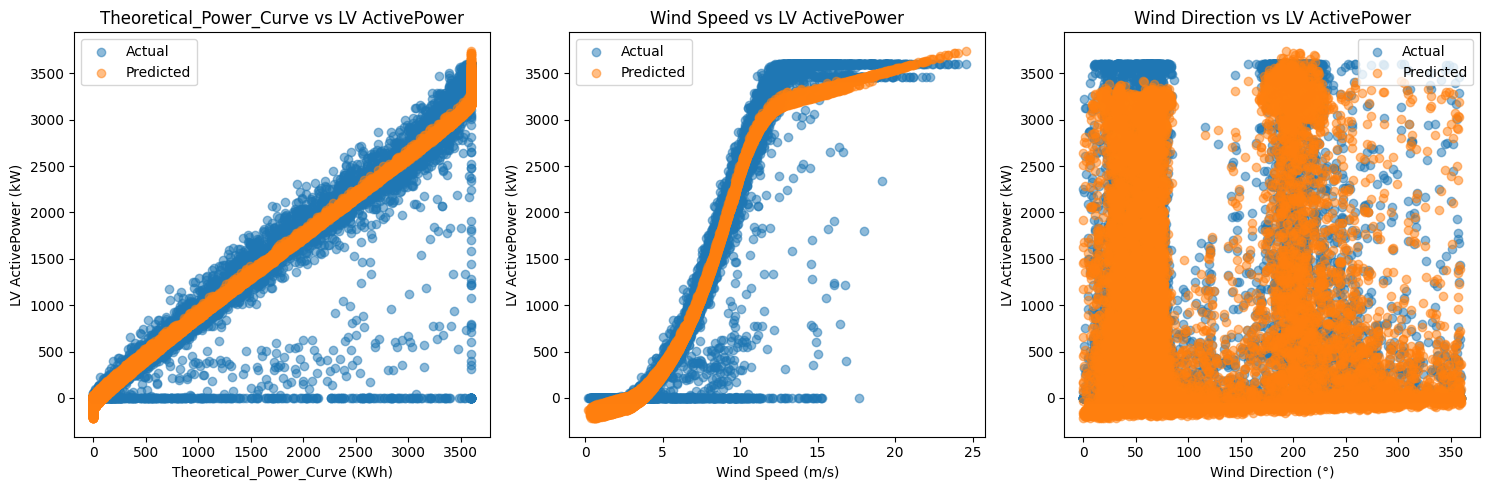

In [ ]:
plt.figure(figsize=(15, 5))

# Plotting for Theoretical_Power_Curve (KWh)
plt.subplot(1, 3, 1)
plt.scatter(X_test['Theoretical_Power_Curve (KWh)'], y_test, label='Actual', alpha=0.5)
plt.scatter(X_test['Theoretical_Power_Curve (KWh)'], predictions, label='Predicted', alpha=0.5)
plt.xlabel('Theoretical_Power_Curve (KWh)')
plt.ylabel('LV ActivePower (kW)')
plt.title('Theoretical_Power_Curve vs LV ActivePower')
plt.legend()

# Plotting for Wind Speed (m/s)
plt.subplot(1, 3, 2)
plt.scatter(X_test['Wind Speed (m/s)'], y_test, label='Actual', alpha=0.5)
plt.scatter(X_test['Wind Speed (m/s)'], predictions, label='Predicted', alpha=0.5)
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('LV ActivePower (kW)')
plt.title('Wind Speed vs LV ActivePower')
plt.legend()

# Plotting for Wind Direction (°)
plt.subplot(1, 3, 3)
plt.scatter(X_test['Wind Direction (°)'], y_test, label='Actual', alpha=0.5)
plt.scatter(X_test['Wind Direction (°)'], predictions, label='Predicted', alpha=0.5)
plt.xlabel('Wind Direction (°)')
plt.ylabel('LV ActivePower (kW)')
plt.title('Wind Direction vs LV ActivePower')
plt.legend()

plt.tight_layout()
plt.show()

##### **4. Complete the cells below to look at the coefficients and intercept to determine the modeled relationships quantitatively.**

In [ ]:
coefficients = model.coef_
intercept = model.intercept_
coefficients = pd.DataFrame([coefficients], columns = X_test.columns)
intercept = pd.DataFrame([intercept], columns = ['LV ActivePower (kW)'])

In [ ]:
print("Coefficients:")
coefficients.head()

Coefficients:


,Theoretical_Power_Curve (KWh),Wind Speed (m/s),Wind Direction (°)
0,0.784223,44.397123,0.405184


In [ ]:
print("\nIntercept:")
intercept.head()


Intercept:


,LV ActivePower (kW)
0,-248.41128


<a name="p2.2"></a>

---
### **[OPTIONAL] Part 2.2: Attempting to Improve the Model**
---

In this challenging, optional section, you can work through several ways to *attempt* improving the model by considering the nature of this particular dataset.

#### **Problem #2.2.1**

Let's start by addressing what we observed in Problem #1.2.10. Specifically,
1. Drop any data points where `LV ActivePower (kW)` is 0 or `Theoretical_Power_Curve (KWh)` is at its maximum from the features and labels used for modeling.

2. Perform Steps #2 - 7 with a linear regression model for these modified features and labels, including the visualizations of the model's predictions and residuals.

In [ ]:
# Select only valid data points
power_df = power_df[power_df['LV ActivePower (kW)'] != 0]
power_df = power_df[power_df['Theoretical_Power_Curve (KWh)'] != power_df['Theoretical_Power_Curve (KWh)'].max()]

# Steps #2 - 7
x = power_df[['Theoretical_Power_Curve (KWh)', 'Wind Speed (m/s)', 'Wind Direction (°)']]
y = power_df['LV ActivePower (kW)']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print("R2: " + str(r2_score(y_test, predictions)))
print("MSE: " + str(mean_squared_error(y_test, predictions)))
print("MAE: " + str(mean_absolute_error(y_test, predictions)))

R2: 0.9477123815799045
MSE: 63561.26121762429
MAE: 130.77122393731457


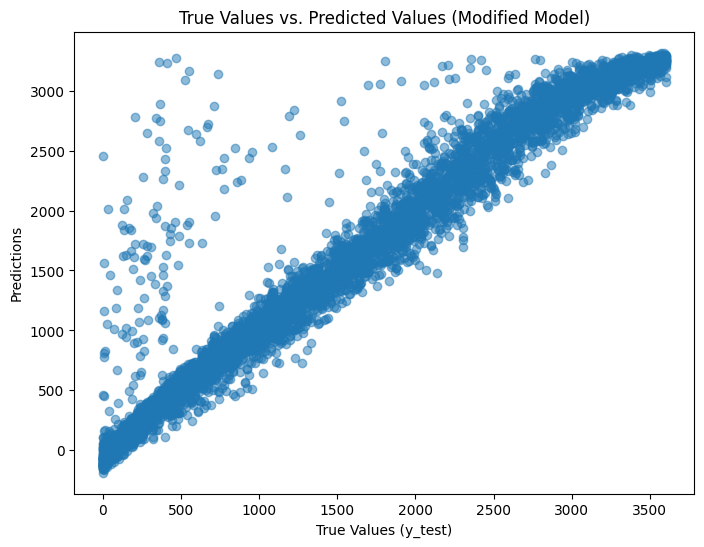

In [ ]:
# Visualize comparison of predictions vs. actual values

plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.xlabel('True Values (y_test)')
plt.ylabel('Predictions')
plt.title('True Values vs. Predicted Values (Modified Model)')

plt.show()

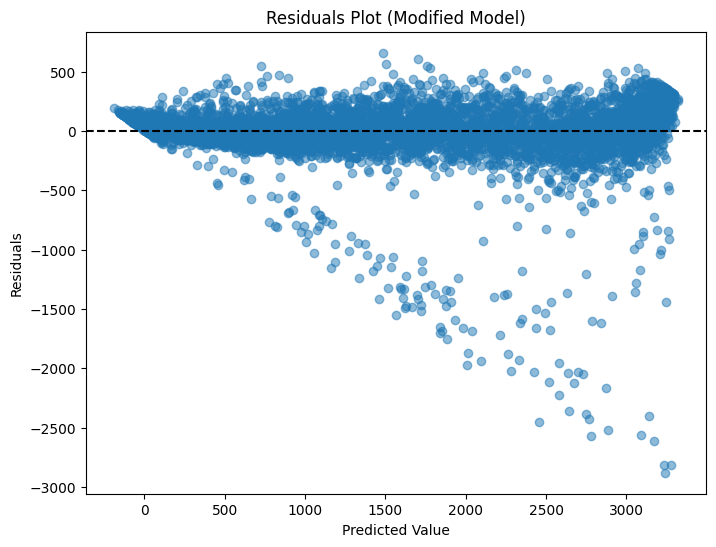

In [ ]:
# Visualize residuals on the test set

residuals_modified = y_test - predictions

plt.figure(figsize=(8, 6))
plt.scatter(predictions, residuals_modified, alpha=0.5)
plt.axhline(y=0, color='black', linestyle='--')

plt.title("Residuals Plot (Modified Model)")
plt.xlabel("Predicted Value")
plt.ylabel("Residuals")

plt.show()

#### **Problem #2.2.2**

You should have seen an improvement in the results, but still noticed a few items of concern. In particular, notice that the residuals plot is *almost* equally distributed around 0 *except* points that form a nearly straight line changing with predicted value. This was present before, but the fixes in Problem #2.2.1 did not seem to completely address this "oddity".

<br>

This is likely due to the role that *time* plays in our data. This creates complex, correlated relationships between data points meaning that the order of data matters--something that very few models are built to handle. This kind of data, known formally as [time series data](https://en.wikipedia.org/wiki/Time_series), actually requires much deeper and specific statistical tools than what we will explore in this course. However, we can try several different ways of dealing with time.


Let's start by simply including time as a feature so that perhaps our model can learn about it. Specifically,

1. In the modified DataFrame from above, create a new feature called `Time (min)` that equals `power_df.index` times 10.

2. Perform Steps #2 - 7 with a linear regression model for these modified features and labels, including the visualizations of the model's predictions and residuals.

In [ ]:
# Create the Time (min) feature
power_df['Time (min)'] = power_df.index * 10

# Select features and labels
x_time = power_df[['Theoretical_Power_Curve (KWh)', 'Wind Speed (m/s)', 'Wind Direction (°)', 'Time (min)']]
y_time = power_df['LV ActivePower (kW)']

# Splitting the data into training and testing sets
X_train_time, X_test_time, y_train_time, y_test_time = train_test_split(x_time, y_time, test_size=0.2, random_state=42)

# Initialize and fit a linear regression model
model_time = LinearRegression()
model_time.fit(X_train_time, y_train_time)

# Make predictions on the test set
predictions_time = model_time.predict(X_test_time)

# Calculate R2, MSE, and MAE for the model with time feature
r2_time = r2_score(y_test_time, predictions_time)
mse_time = mean_squared_error(y_test_time, predictions_time)
mae_time = mean_absolute_error(y_test_time, predictions_time)

print("R2 (with Time): " + str(r2_time))
print("MSE (with Time): " + str(mse_time))
print("MAE (with Time): " + str(mae_time))

R2 (with Time): 0.9476954707407069
MSE (with Time): 63581.818173556145
MAE (with Time): 130.59842640858702


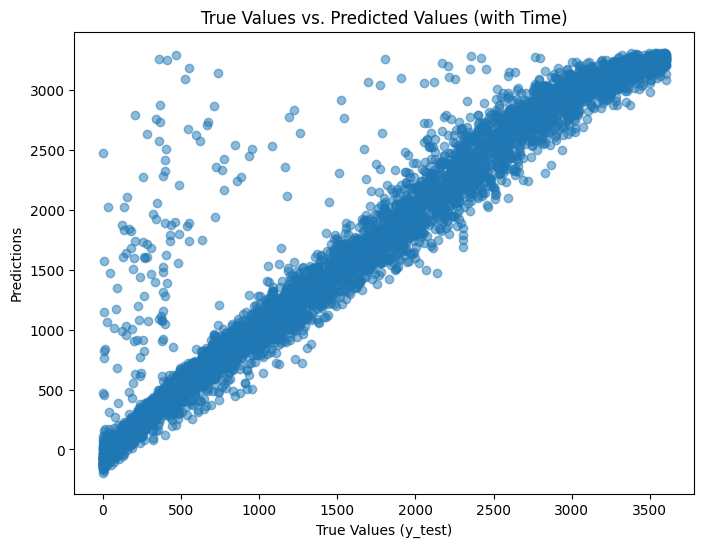

In [ ]:
# Visualize comparison of predictions vs. actual values

plt.figure(figsize=(8, 6))
plt.scatter(y_test_time, predictions_time, alpha=0.5)
plt.xlabel('True Values (y_test)')
plt.ylabel('Predictions')
plt.title('True Values vs. Predicted Values (with Time)')

plt.show()

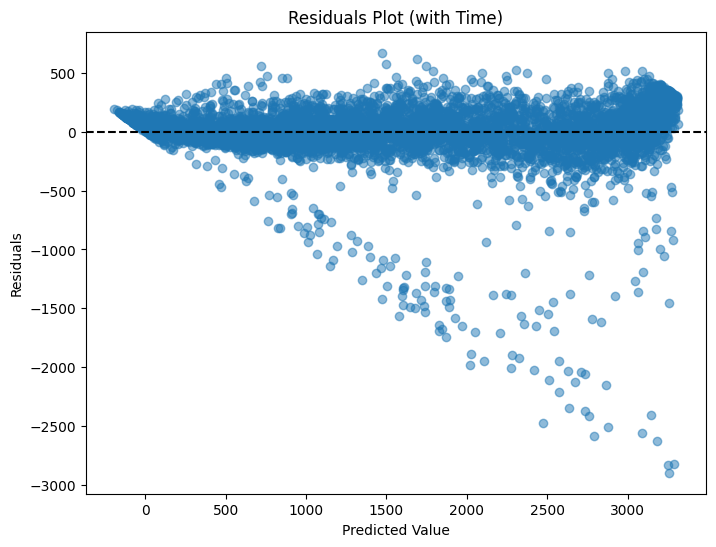

In [ ]:
# Visualize residuals on the test set

residuals_time = y_test_time - predictions_time

plt.figure(figsize=(8, 6))
plt.scatter(predictions_time, residuals_time, alpha=0.5)
plt.axhline(y=0, color='black', linestyle='--')  # Add a horizontal line at y=0

plt.title("Residuals Plot (with Time)")
plt.xlabel("Predicted Value")
plt.ylabel("Residuals")

plt.show()

#### **Problem #2.2.3**

You likely noticed very little difference in the results. Simply including time as a feature is not enough. One aspect of more sophisticated approaches is to predict the *difference* between points instead of the values of the points themselves. This is commonly known as [integration](https://en.wikipedia.org/wiki/Order_of_integration), [lag, or backshift](https://en.wikipedia.org/wiki/Lag_operator).

While the theory behind this can get complex, we can implement it quite simply using the [`.shift(...)` method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html) built into DataFrames that shifts data by a given number of rows.

<br>

Let's use the `.shift(...)` method to predict the difference in data points. Specifically,

1. Instead of `x` and `y`, prepare the variables `x_diffs` and `y_diffs` as our data for modeling such that they represent a shift of 1 row in the `x` and `y` data *without the `Time (min)` variable*.

2. Perform Steps #2 - 7 with a linear regression model for these modified features and labels, including the visualizations of the model's predictions and residuals.

In [ ]:
# Prepare the shifted dataset
x = power_df[['Theoretical_Power_Curve (KWh)', 'Wind Speed (m/s)', 'Wind Direction (°)', 'Time (min)']]
y = power_df['LV ActivePower (kW)']

x_diffs = x - x.shift(1)
x_diffs = x_diffs.dropna(how='any')

y_diffs = y - y.shift(1)
y_diffs = y_diffs.dropna(how='any')

# Splitting the data into training and testing sets
X_train_diffs, X_test_diffs, y_train_diffs, y_test_diffs = train_test_split(x_diffs, y_diffs, test_size=0.2, random_state=42)

# Initialize and fit a linear regression model for differences
model_diffs = LinearRegression()
model_diffs.fit(X_train_diffs, y_train_diffs)

# Make predictions on the test set
predictions_diffs = model_diffs.predict(X_test_diffs)

# Calculate R2, MSE, and MAE for the model with differences
r2_diffs = r2_score(y_test_diffs, predictions_diffs)
mse_diffs = mean_squared_error(y_test_diffs, predictions_diffs)
mae_diffs = mean_absolute_error(y_test_diffs, predictions_diffs)

print("R2 (with Differences): " + str(r2_diffs))
print("MSE (with Differences): " + str(mse_diffs))
print("MAE (with Differences): " + str(mae_diffs))

R2 (with Differences): 0.7524297028085494
MSE (with Differences): 20459.823555622694
MAE (with Differences): 64.3311507721865


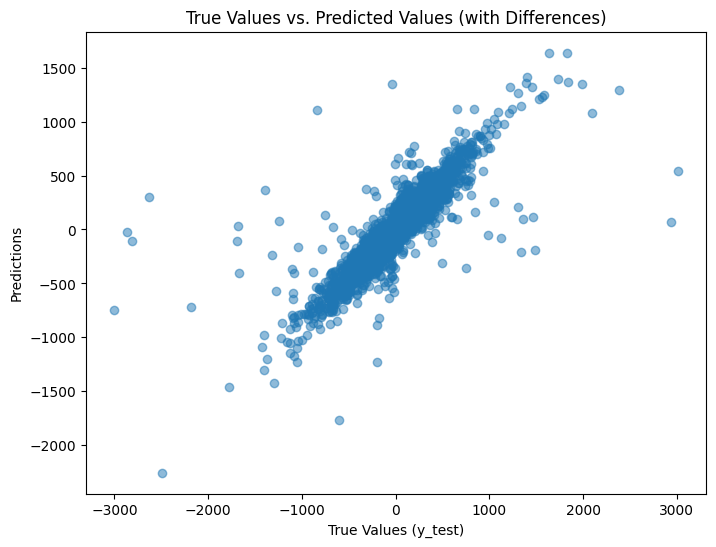

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test_diffs, predictions_diffs, alpha=0.5)
plt.xlabel('True Values (y_test)')
plt.ylabel('Predictions')
plt.title('True Values vs. Predicted Values (with Differences)')

plt.show()

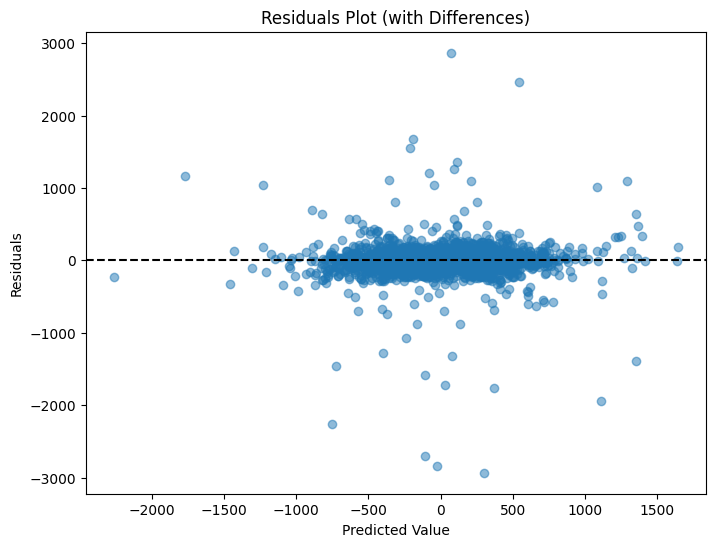

In [ ]:
residuals_diffs = y_test_diffs - predictions_diffs

plt.figure(figsize=(8, 6))
plt.scatter(predictions_diffs, residuals_diffs, alpha=0.5)
plt.axhline(y=0, color='black', linestyle='--')

plt.title("Residuals Plot (with Differences)")
plt.xlabel("Predicted Value")
plt.ylabel("Residuals")

plt.show()

#### **Problem #2.2.4**

You should have seen interesting results where the $\text{R}^2$ went down (around 0.72), but all other measures of model performance improved. However, an $\text{R}^2 > 0.7$ is still considered good in practice, particularly given the other markers of success and the many layers of consideration that have been included in our model.

From here, it is a matter of adjusting the exact shift we use and eventually moving onto even more advanced methods such as [ARIMA](https://en.wikipedia.org/wiki/Autoregressive_integrated_moving_average).

<br>

In the space below, explore how changing the amount of shift impacts the model's performance.

In [ ]:
# Create the shifted dataset and perform Steps #2 - 7

shift_values = [1, 2, 3, 4, 5]  # Adjust shift values to explore different shifts

for shift in shift_values:
    x_diffs_shift = x - x.shift(shift)
    x_diffs_shift = x_diffs_shift.dropna(how='any')

    y_diffs_shift = y - y.shift(shift)
    y_diffs_shift = y_diffs_shift.dropna(how='any')

    # Splitting the data into training and testing sets
    X_train_shift, X_test_shift, y_train_shift, y_test_shift = train_test_split(x_diffs_shift, y_diffs_shift, test_size=0.2, random_state=42)

    # Initialize and fit a linear regression model for different shifts
    model_shift = LinearRegression()
    model_shift.fit(X_train_shift, y_train_shift)

    # Make predictions on the test set
    predictions_shift = model_shift.predict(X_test_shift)

    # Calculate R2, MSE, and MAE for different shifts
    r2_shift = r2_score(y_test_shift, predictions_shift)
    mse_shift = mean_squared_error(y_test_shift, predictions_shift)
    mae_shift = mean_absolute_error(y_test_shift, predictions_shift)

    print(f"For shift = {shift}:")
    print("R2 (with Differences): " + str(r2_shift))
    print("MSE (with Differences): " + str(mse_shift))
    print("MAE (with Differences): " + str(mae_shift))
    print("\n")

For shift = 1:
R2 (with Differences): 0.7524297028085494
MSE (with Differences): 20459.823555622694
MAE (with Differences): 64.3311507721865


For shift = 2:
R2 (with Differences): 0.8070003477755257
MSE (with Differences): 30997.805590851687
MAE (with Differences): 82.04152163860763


For shift = 3:
R2 (with Differences): 0.839478535231317
MSE (with Differences): 33247.320580149375
MAE (with Differences): 88.19409180226795


For shift = 4:
R2 (with Differences): 0.8648965532873754
MSE (with Differences): 34164.96760597556
MAE (with Differences): 94.76523693759296


For shift = 5:
R2 (with Differences): 0.8630797074647547
MSE (with Differences): 41508.73573999879
MAE (with Differences): 100.10972064324635




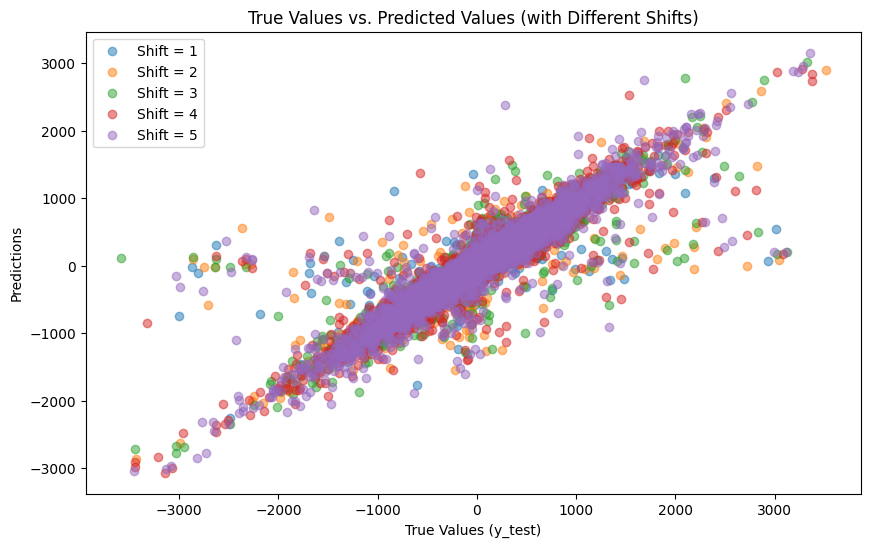

In [ ]:
plt.figure(figsize=(10, 6))

for shift in shift_values:
    x_diffs_shift = x - x.shift(shift)
    x_diffs_shift = x_diffs_shift.dropna(how='any')

    y_diffs_shift = y - y.shift(shift)
    y_diffs_shift = y_diffs_shift.dropna(how='any')

    X_train_shift, X_test_shift, y_train_shift, y_test_shift = train_test_split(x_diffs_shift, y_diffs_shift, test_size=0.2, random_state=42)

    model_shift = LinearRegression()
    model_shift.fit(X_train_shift, y_train_shift)

    predictions_shift = model_shift.predict(X_test_shift)

    plt.scatter(y_test_shift, predictions_shift, label=f"Shift = {shift}", alpha=0.5)

plt.xlabel('True Values (y_test)')
plt.ylabel('Predictions')
plt.title('True Values vs. Predicted Values (with Different Shifts)')
plt.legend()
plt.show()

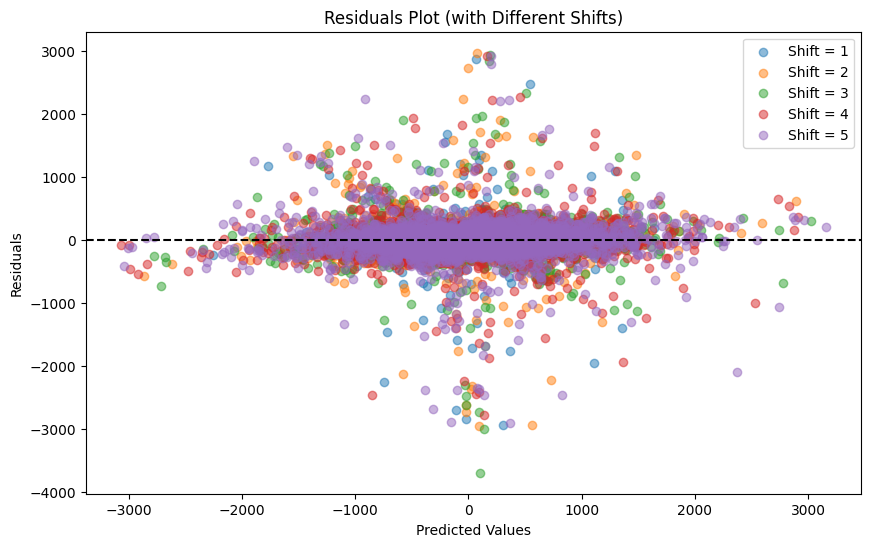

In [ ]:
plt.figure(figsize=(10, 6))

for shift in shift_values:
    x_diffs_shift = x - x.shift(shift)
    x_diffs_shift = x_diffs_shift.dropna(how='any')

    y_diffs_shift = y - y.shift(shift)
    y_diffs_shift = y_diffs_shift.dropna(how='any')

    X_train_shift, X_test_shift, y_train_shift, y_test_shift = train_test_split(x_diffs_shift, y_diffs_shift, test_size=0.2, random_state=42)

    model_shift = LinearRegression()
    model_shift.fit(X_train_shift, y_train_shift)

    predictions_shift = model_shift.predict(X_test_shift)
    residuals_shift = y_test_shift - predictions_shift

    plt.scatter(predictions_shift, residuals_shift, label=f"Shift = {shift}", alpha=0.5)

plt.axhline(y=0, color='black', linestyle='--')  # Add a horizontal line at y=0

plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot (with Different Shifts)')
plt.legend()
plt.show()


---
#End of Notebook

© 2023 The Coding School, All rights reserved